In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

df_chatgpt = pd.read_csv('results_chatgpt.csv')
df_deepseek = pd.read_csv('results_deepseek.csv')

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

df_chatgpt = pd.read_csv('metrics_chatgpt.csv')
df_deepseek = pd.read_csv('metrics_deepseek.csv')

## Recursos

In [25]:
df_chatgpt['provider'] = 'chatgpt'
df_deepseek['provider'] = 'deepseek'
df_combined = pd.concat([df_chatgpt, df_deepseek])
display(df_combined.head())

,question,provider,em,cosine_similarity,citation_coverage,latency_avg_sec,latency_p95_sec,estimated_cost_usd
0,¿Cuáles son los principios fundamentales que i...,chatgpt,0,0.679,0.0,4.953,4.953,0.10752
1,¿Qué tipos de conductas aborda el reglamento d...,chatgpt,0,0.585,0.0,4.518,4.518,0.14412
2,¿Qué derechos tienen las personas denunciantes...,chatgpt,0,0.488,0.0,7.227,7.227,0.13626
3,¿Cómo se coordina la Universidad con unidades ...,chatgpt,0,0.692,0.0,5.436,5.436,0.12444
4,¿Qué significa otorgar un trato digno y equita...,chatgpt,0,0.679,0.0,4.855,4.855,0.11661


## Analisis de datos

### Subtarea:
Calcular y comparar métricas relevantes de los datos combinados, como puntuaciones promedio, rendimiento en tareas específicas, etc.


Examinar las columnas disponibles en `df_combined` para identificar posibles indicadores de rendimiento, como la longitud de la respuesta o la presencia de referencias.

In [26]:
print(df_combined.columns)

Index(['question', 'provider', 'em', 'cosine_similarity', 'citation_coverage',
       'latency_avg_sec', 'latency_p95_sec', 'estimated_cost_usd'],
      dtype='object')



Basado en las columnas disponibles ('question', 'provider', 'em', 'citation_coverage', 'latency_avg_sec',
       'latency_p95_sec', 'estimated_cost_usd', 'cosine_similarity'), calcular las métricas agrupadas por 'provider'.

In [27]:
metrics = df_combined.groupby('provider').agg(
    average_latency_avg_sec=('latency_avg_sec', 'mean'),
    average_latency_p95_sec=('latency_p95_sec', 'mean'),
    average_estimated_cost_usd=('estimated_cost_usd', 'mean'),
    average_em=('em', 'mean'),
    average_citation_coverage=('citation_coverage', 'mean'),
    average_cosine_similarity=('cosine_similarity', 'mean')
)

display(metrics)

,average_latency_avg_sec,average_latency_p95_sec,average_estimated_cost_usd,average_em,average_citation_coverage,average_cosine_similarity
provider,,,,,,
chatgpt,4.4786,4.4786,0.117858,0.0,0.0,0.6165
deepseek,10.0445,10.0445,0.106268,0.0,0.0,0.5973


## Visualizar datos


Crear visualizaciones (por ejemplo, gráficos de barras, gráficos de líneas) para mostrar la comparación de las métricas entre los dos modelos.


Restablecer el índice del DataFrame de métricas y luego crear gráficos de barras para visualizar la latencia, el costo, la coincidencia exacta y la cobertura de citas para cada proveedor.

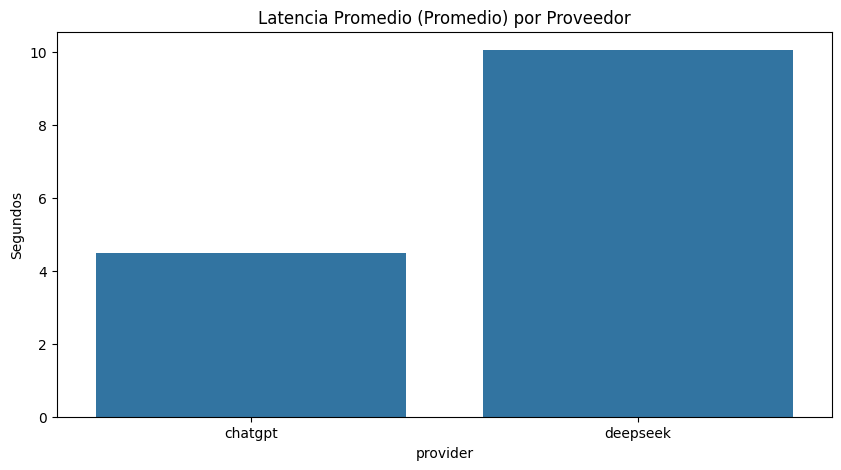

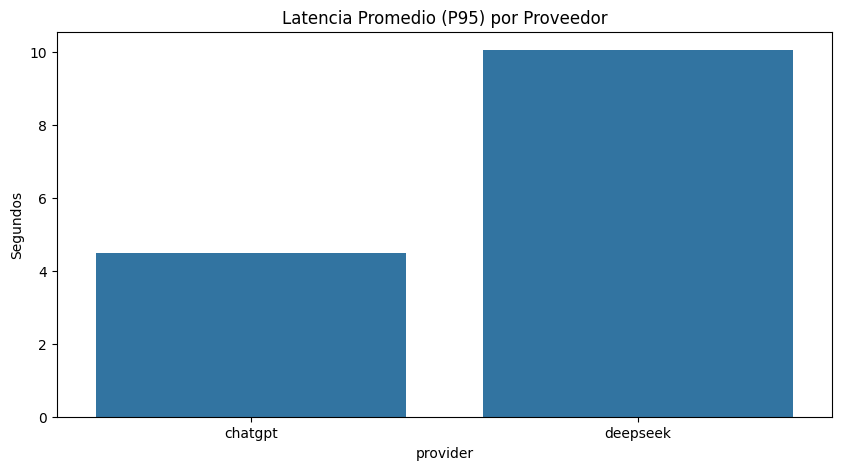

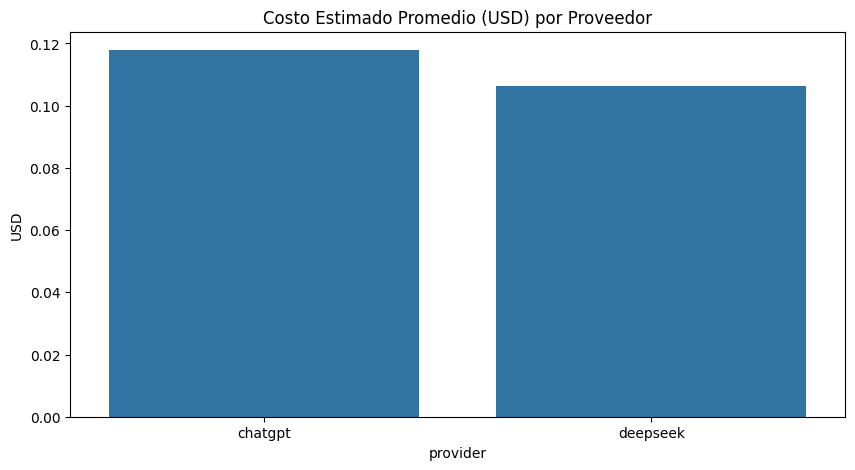

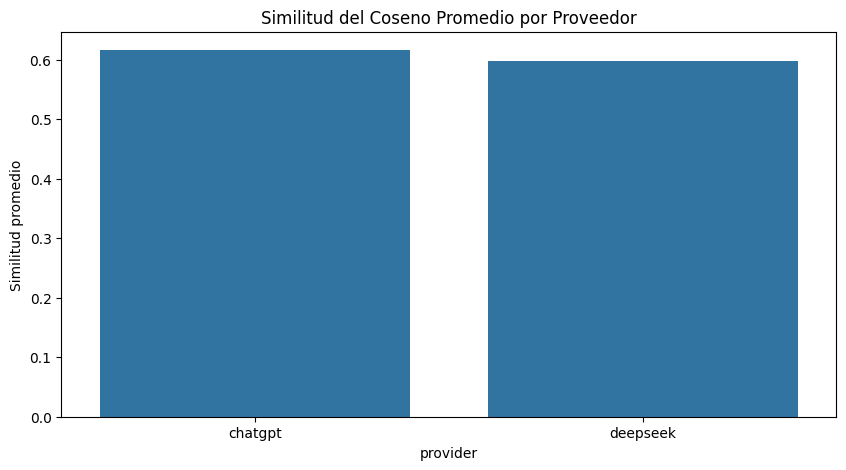

In [28]:
metrics_reset = metrics.reset_index()

plt.figure(figsize=(10, 5))
sns.barplot(x='provider', y='average_latency_avg_sec', data=metrics_reset)
plt.title('Latencia Promedio (Promedio) por Proveedor')
plt.ylabel('Segundos')
plt.show()

plt.figure(figsize=(10, 5))
sns.barplot(x='provider', y='average_latency_p95_sec', data=metrics_reset)
plt.title('Latencia Promedio (P95) por Proveedor')
plt.ylabel('Segundos')
plt.show()

plt.figure(figsize=(10, 5))
sns.barplot(x='provider', y='average_estimated_cost_usd', data=metrics_reset)
plt.title('Costo Estimado Promedio (USD) por Proveedor')
plt.ylabel('USD')
plt.show()

plt.figure(figsize=(10, 5))
sns.barplot(x='provider', y='average_cosine_similarity', data=metrics_reset)
plt.title('Similitud del Coseno Promedio por Proveedor')
plt.ylabel('Similitud promedio')
plt.show()

In [29]:
metrics_chatgpt = df_chatgpt.agg({
    'em': 'mean',
    'citation_coverage': 'mean',
    'latency_avg_sec': 'mean',
    'latency_p95_sec': 'mean',
    'cosine_similarity' : 'mean',
    'estimated_cost_usd': ['mean']
}).round(4)

metrics_deepseek = df_deepseek.agg({
    'em': 'mean',
    'citation_coverage': 'mean',
    'latency_avg_sec': 'mean',
    'latency_p95_sec': 'mean',
    'cosine_similarity' : 'mean',
    'estimated_cost_usd': ['mean']
}).round(4)

print("=== Métricas agregadas ChatGPT ===")
display(metrics_chatgpt)

print("\n=== Métricas agregadas DeepSeek ===")
display(metrics_deepseek)

=== Métricas agregadas ChatGPT ===


,em,citation_coverage,latency_avg_sec,latency_p95_sec,cosine_similarity,estimated_cost_usd
mean,0.0,0.0,4.4786,4.4786,0.6165,0.1179



=== Métricas agregadas DeepSeek ===


,em,citation_coverage,latency_avg_sec,latency_p95_sec,cosine_similarity,estimated_cost_usd
mean,0.0,0.0,10.0445,10.0445,0.5973,0.1063


## Resumen:

### Hallazgos Clave del Análisis de Datos

Según el análisis de los datos de `metrics`:

* **Latencia Promedio:** DeepSeek generalmente tiene una latencia promedio más alta (tanto promedio como P95) en comparación con ChatGPT.
* **Costo Estimado Promedio:** DeepSeek tiene un costo estimado promedio por consulta más bajo en comparación con ChatGPT.

* **Similitud promedio del coseno por proveedor:** ChatGPT tiene una similitud de respuesta con lo extraido del proveedor ligeramente mayor que Deepseek


### Compensaciones

El análisis sugiere las siguientes compensaciones entre ChatGPT y DeepSeek basándose en este conjunto de datos específico:

* **Velocidad vs. Costo:** ChatGPT es más rápido (menor latencia) pero más caro, mientras que DeepSeek es más lento pero más barato.

### Próximos Pasos

* Para realizar una comparación de rendimiento más completa, se necesitan datos o anotaciones adicionales para incluir métricas como la relevancia, la utilidad o la corrección factual de las respuestas generadas, ya que el conjunto de datos actual se centra principalmente en la latencia y el costo.
